# **ETL** y **EDA** de _`REVIEW`_ y _`USER`_ en **YELP**

### Importar las librerías necesarias

In [2]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="darkgrid")

## **ETL**

## **_`REVIEW`_**

Primero se va extraer review que está en formato .json y luego se va transformar a formato .parquet con la finalidad de ahorrar memoria y trabajar solo con el archivo en formato parquet.

In [2]:
data = []
with open('Yelp/review-001.json', encoding='utf-8') as f:
    for line in f:
        data.append(json.loads(line))
df_review = pd.DataFrame(data)

Se visualiza las primera 3 filas para saber lo que contiene el dataframe

In [3]:
df_review.head(3)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30


Ahora se va convertir el archivo a formato .parquet con la finalidad de ahorrar espacio

In [4]:
df_review.to_parquet('Yelp/review.parquet', index=False)

Ahora se va a eliminar"df_review"

In [5]:
del df_review

Apartir de aquí se trabajará con el archivo review.parquet

In [3]:
df_review = pd.read_parquet('Yelp/review.parquet')
df_review.head(2)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18


In [15]:
df_review.shape

(6990280, 10)

In [4]:
df_review['year'] = pd.to_datetime(df_review['date']).dt.year

In [6]:
df_review.head(2)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,2018
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,2012


Verificar hasta qué fecha están los datos

In [11]:
df_review['date'] = pd.to_datetime(df_review['date'])

fecha_maxima = df_review['date'].max()

Los datos solo están hasta el 12 de enero del 2022

In [12]:
fecha_maxima

Timestamp('2022-01-19 19:48:45')

In [ ]:
df_review['year'] = pd.to_datetime(df_review['date']).dt.year

In [10]:
df_review.describe()

,stars,useful,funny,cool,year
count,6990280.00,6990280.00,6990280.00,6990280.00,6990280.00
mean,3.75,1.18,0.33,0.50,2016.54
std,1.48,3.25,1.69,2.17,3.08
min,1.00,-1.00,-1.00,-1.00,2005.00
25%,3.00,0.00,0.00,0.00,2015.00
50%,4.00,0.00,0.00,0.00,2017.00
75%,5.00,1.00,0.00,0.00,2019.00
max,5.00,1182.00,792.00,404.00,2022.00


Se filtran los datos a partir del 2015, porque reseñas más antiguas no van a ser adecuadas para el estudio

In [13]:
df_review_desde_2015 = df_review[df_review['date'].dt.year >= 2015]

In [14]:
df_review_desde_2015.shape

(5285402, 10)

Ahora se verifica el tamaño y la existencia de valores nulos

In [16]:
df_review_desde_2015.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
year           0
dtype: int64

No existen valores nulos

### Verificar la existencia de valores duplicados

Se verificará la existencia de valores duplicados por _`review_id`_, porque debe haber solo un ID por review

In [17]:
df_review_desde_2015['review_id'].duplicated().any()

False

No existen valores duplicados por _`review_id`_

Ahora verifiquemos si existen valores duplicados por _`business_id`_

In [18]:
df_review_desde_2015['business_id'].duplicated().any()

True

In [19]:
df_review_desde_2015['business_id'].value_counts()

business_id
ac1AeYqs8Z4_e2X5M3if2A    6598
GXFMD0Z4jEVZBCsbPf4CTQ    5529
_ab50qdWOk0DdB6XOrBitw    5297
oBNrLz4EDhiscSlbOl8uAw    4540
1b5mnK8bMnnju_cvU65GqQ    4219
                          ... 
hgbgnJliD3XlbOaTQ1gLDg       1
fAvMcLEBVllP7HEbO2IjDQ       1
eFhwjZ8f_55bdeV5PUy2bg       1
4jenHtiK6VGpe_VRG31j6w       1
HaSEQCVzuVuMtJD_vVlfVg       1
Name: count, Length: 143028, dtype: int64

Existen muchas columnas duplicadas por _`business_id`_, lo cual es normal, porque para un negocio pueden haber muchas reseñas

## **_`USER`_**

El archivo user está en formato parquet, entonces solo lo abriremos como dataframe

In [22]:
df_user = pd.read_parquet('Yelp/user-002.parquet')
df_user.head(2)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946


También se verifica el tamaño y la existencia de valores nulos

In [23]:
df_user.shape

(2105597, 22)

In [24]:
df_user.isnull().sum()

user_id               0
name                  0
review_count          0
yelping_since         0
useful                0
funny                 0
cool                  0
elite                 0
friends               0
fans                  0
average_stars         0
compliment_hot        0
compliment_more       0
compliment_profile    0
compliment_cute       0
compliment_list       0
compliment_note       0
compliment_plain      0
compliment_cool       0
compliment_funny      0
compliment_writer     0
compliment_photos     0
dtype: int64

No existen valores nulos

Después de realizar un análisis exhaustivo, solo se decidió trabajar con 8 columnas que serán relevantes para el análisis. Las demás variables están más relacionadas con el usuario de Yelp que con las reseñas.

In [25]:
user_filtrado = df_user[['user_id', 'name', 'review_count', 'yelping_since', 'useful', 'funny', 'cool', 'average_stars']]

In [26]:
user_filtrado.shape

(2105597, 8)

In [27]:
user_filtrado.head(2)

,user_id,name,review_count,yelping_since,useful,funny,cool,average_stars
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,3.91
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,3.74


### Verificar la existencia de valores duplicados

Se verificará la existencia de valores duplicados por _`user_id`_ y _`name`_, porque debe haber solo un ID por usuario

**_`user_id`_**

In [29]:
user_filtrado['user_id'].duplicated().any()

True

In [30]:
user_filtrado['user_id'].value_counts()

user_id
T5gvmAML_EAA9invlLymJg    5
-J_wra_v8PaPfy2r4_LHiw    5
a25SLDRY8NLhISUucSBZJg    5
zWeCH5pffPS1adw57xzaWA    5
vRYjn0Ip0Zu7SnJYQp9P3Q    5
                         ..
0SGduwsWeTWeL9Sj6pGfyw    1
ManF7sVLflO-i9qWh-oD5g    1
8WCxUvUu8ECp4779Sj5AkA    1
wmSh-O8JDehKBc4QsVUFuw    1
wL5jPrLRVCK_Pmo4lM1zpA    1
Name: count, Length: 1987897, dtype: int64

In [31]:
user_filtrado[user_filtrado['user_id'] == 'T5gvmAML_EAA9invlLymJg']

,user_id,name,review_count,yelping_since,useful,funny,cool,average_stars
21649,T5gvmAML_EAA9invlLymJg,Jason,9,2012-10-08 00:45:33,6,0,3,4.64
2011746,T5gvmAML_EAA9invlLymJg,Jason,9,2012-10-08 00:45:33,6,0,3,4.64
2032846,T5gvmAML_EAA9invlLymJg,Jason,9,2012-10-08 00:45:33,6,0,3,4.64
2053946,T5gvmAML_EAA9invlLymJg,Jason,9,2012-10-08 00:45:33,6,0,3,4.64
2075046,T5gvmAML_EAA9invlLymJg,Jason,9,2012-10-08 00:45:33,6,0,3,4.64


Se eliminarán los registros repetidos por _`user_id`_

**_`name`_**

In [33]:
user_filtrado = user_filtrado.drop_duplicates(subset='user_id').copy()

In [34]:
user_filtrado.shape

(1987897, 8)

In [35]:
user_filtrado['name'].duplicated().any()

True

In [36]:
user_filtrado['name'].value_counts()

name
John         18719
Michael      16645
David        15967
Chris        14591
Mike         13390
             ...  
Udochukwu        1
Trak             1
Rhaya            1
Mikiya           1
Gwendy           1
Name: count, Length: 132361, dtype: int64

Efectivamente, hay muchos nombres duplicados, pero no se eliminaran registros duplicados por nombre, porque varias personas pueden tener el mismo nombre, es solo coincidencia.

## **EDA**

## **_`REVIEW`_**

En el EDA, es esencial entender la composición y las características de los datos que estamos utilizando. Las funciones: **df.info(), df.describe()** son herramientas valiosas para obtener información clave sobre un DataFrame.

In [37]:
df_review_desde_2015.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5285402 entries, 0 to 6990279
Data columns (total 10 columns):
 #   Column       Dtype         
---  ------       -----         
 0   review_id    object        
 1   user_id      object        
 2   business_id  object        
 3   stars        float64       
 4   useful       int64         
 5   funny        int64         
 6   cool         int64         
 7   text         object        
 8   date         datetime64[ns]
 9   year         int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(3), object(4)
memory usage: 423.4+ MB


In [38]:
df_review_desde_2015.describe()

,stars,useful,funny,cool,date,year
count,5285402.00,5285402.00,5285402.00,5285402.00,5285402,5285402.00
mean,3.76,1.04,0.26,0.47,2018-05-31 02:41:25.534669568,2017.92
min,1.00,-1.00,-1.00,-1.00,2015-01-01 00:00:05,2015.00
25%,3.00,0.00,0.00,0.00,2016-10-22 23:49:14,2016.00
50%,4.00,0.00,0.00,0.00,2018-05-31 14:20:54.500000,2018.00
75%,5.00,1.00,0.00,0.00,2019-11-05 22:09:10,2019.00
max,5.00,1182.00,792.00,304.00,2022-01-19 19:48:45,2022.00
std,1.52,3.12,1.40,2.14,NaN,1.91


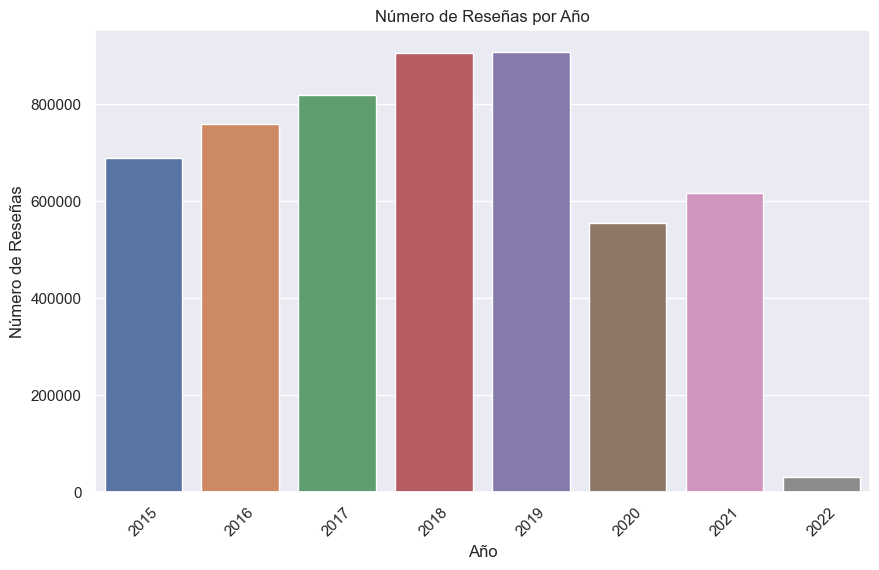

In [42]:
reviews_por_año = df_review_desde_2015.groupby('year')['review_id'].count().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=reviews_por_año, x='year', y='review_id')
plt.xlabel('Año')
plt.ylabel('Número de Reseñas')
plt.title('Número de Reseñas por Año')
plt.xticks(rotation=45)
plt.show()

In [43]:
reviews_por_año

,year,review_id
0,2015,688415
1,2016,758882
2,2017,820048
3,2018,906362
4,2019,907284
5,2020,554557
6,2021,618189
7,2022,31665


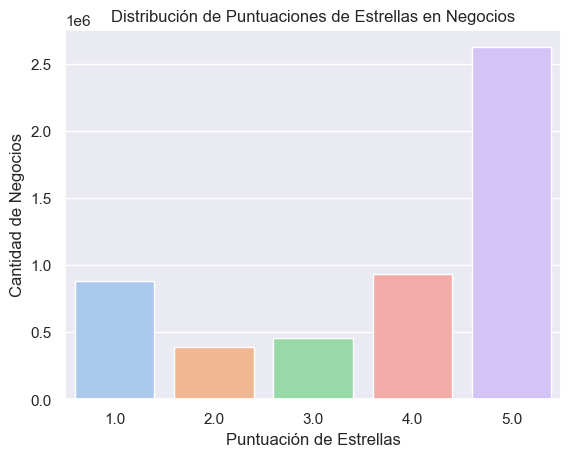

In [39]:
sns.countplot(data=df_review_desde_2015, x='stars', palette='pastel')

plt.xlabel('Puntuación de Estrellas')
plt.ylabel('Cantidad de Negocios')
plt.title('Distribución de Puntuaciones de Estrellas en Negocios')
plt.show()

In [44]:
df_review_desde_2015.head(2)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.00,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,2018
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.00,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,2015


Se van a eliminar las columnas **funny** y **cool**, ya que la que más va ser más útil para el análisis será la columna "useful"

Pero antes, se va dividir en dos partes el dataframe para ahorrar espacio al momento de exportar los archivos

In [52]:
df_review_2015_2019 = df_review[(df_review['year'] >= 2015) & (df_review['year'] <= 2019)]
df_review_2020_2022 = df_review[df_review['year'] >= 2020]

In [54]:
df_review_2015_2019 = df_review_2015_2019.drop(columns=['year', 'funny', 'cool'])
df_review_2020_2022 = df_review_2020_2022.drop(columns=['year', 'funny', 'cool'])

In [55]:
df_review_2015_2019.head(2)

,review_id,user_id,business_id,stars,useful,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.00,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.00,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03


In [ ]:
df_review_2015_2019.to_parquet('Yelp/review_2015_2019.parquet', index=False)
df_review_2020_2022.to_parquet('Yelp/review_2020_2022.parquet', index=False)

## **_`USER`_**

**df.info(), df.describe()**

In [40]:
user_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1987897 entries, 0 to 1987896
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   user_id        object 
 1   name           object 
 2   review_count   int64  
 3   yelping_since  object 
 4   useful         int64  
 5   funny          int64  
 6   cool           int64  
 7   average_stars  float64
dtypes: float64(1), int64(4), object(3)
memory usage: 136.5+ MB


In [41]:
user_filtrado.describe()

,review_count,useful,funny,cool,average_stars
count,1987897.00,1987897.00,1987897.00,1987897.00,1987897.00
mean,23.39,42.30,16.97,23.79,3.63
std,82.57,641.48,407.80,565.35,1.18
min,0.00,0.00,0.00,0.00,1.00
25%,2.00,0.00,0.00,0.00,3.00
50%,5.00,3.00,0.00,0.00,3.88
75%,17.00,13.00,2.00,3.00,4.56
max,17473.00,206296.00,185823.00,199878.00,5.00


In [48]:
user_filtrado.to_parquet('Yelp/user_filtrado.parquet', index=False)